In [1]:
pip install opencv-python numpy scikit-learn tqdm 

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ==== Step 1: Basic Settings ====
DATADIR = "train"  # Folder containing images
CATEGORIES = ["cat", "dog"]  # Classes
IMG_SIZE = 32  # Resize image to 32x32 pixels
MAX_IMAGES_PER_CLASS = 1000  


In [5]:
def create_dataset():
    data = []
    counts = {"cat": 0, "dog": 0}

    for img in tqdm(os.listdir(DATADIR), desc="Loading images"):
        label = None
        if img.lower().startswith("cat") and counts["cat"] < MAX_IMAGES_PER_CLASS:
            label = 0
            counts["cat"] += 1
        elif img.lower().startswith("dog") and counts["dog"] < MAX_IMAGES_PER_CLASS:
            label = 1
            counts["dog"] += 1
        else:
            continue  # Skip unknown or overflow

        try:
            img_path = os.path.join(DATADIR, img)
            img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([resized.flatten(), label])
        except Exception as e:
            pass

    print("Loaded images per class:", counts)
    return data

In [7]:
dataset = create_dataset()
np.random.shuffle(dataset)

X = np.array([features for features, label in dataset])
y = np.array([label for features, label in dataset])

# ==== Step 4: Standardize ====
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ==== Step 5: Train/Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== Step 6: Train SVM ====
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# ==== Step 7: Evaluate ====
y_pred = model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=CATEGORIES))

Loading images: 100%|██████████████████████████████████████████████████████████| 21317/21317 [00:02<00:00, 8207.50it/s]


Loaded images per class: {'cat': 1000, 'dog': 1000}

✅ Accuracy: 0.5275

📊 Classification Report:
              precision    recall  f1-score   support

         cat       0.52      0.53      0.53       199
         dog       0.53      0.52      0.53       201

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



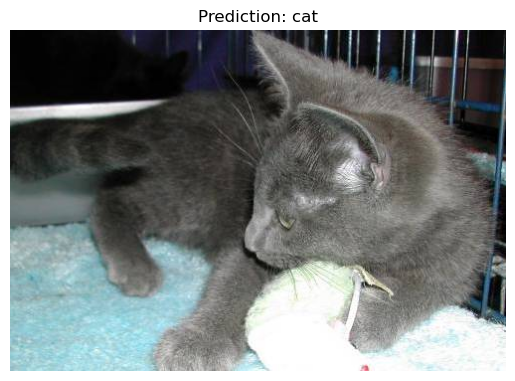

Prediction: cat


In [16]:
import cv2
import matplotlib.pyplot as plt

def predict_and_show_matplotlib(image_path, model, scaler):
    IMG_SIZE = 32
    CATEGORIES = ["cat", "dog"]

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"❌ Failed to load image at {image_path}")
        return None

    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_flattened = img_resized.flatten().reshape(1, -1)
    img_scaled = scaler.transform(img_flattened)
    prediction = model.predict(img_scaled)[0]
    label = CATEGORIES[prediction]

    # Read original image in RGB for plt (cv2 loads BGR)
    img_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb)
    plt.title(f"Prediction: {label}")
    plt.axis('off')
    plt.show()

    return label

image_path = r"C:\Users\91961\machine-learning-project\predict_image\test\100.jpg"
result = predict_and_show_matplotlib(image_path, model, scaler)
print("Prediction:", result)


In [20]:
import pickle

# Save your trained model
with open("svm_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save your scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [22]:
import pickle

# Load model
with open("svm_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

# Load scaler
with open("scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

print("✅ Model and scaler loaded successfully.")


✅ Model and scaler loaded successfully.
